# Dashboard du Challenge

Import des modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set()
%matplotlib inline

Chargement des données du challenge

In [23]:
DASHBOARD_FILE = "/home/cisd-jacq/projet/dashboard/dashboard.csv"
results = pd.read_csv(DASHBOARD_FILE)
results["log_error"] = np.log10(results["error"])
results["date"] = pd.to_datetime(results["timestamp"], unit="s")

# Leaderboard

In [24]:
best_result = results.groupby("team", as_index=False).error.agg(
    {
            "erreur": "min",
            "predictions": "count"
    })
best_result.sort_values("erreur", ascending=True)

,team,erreur,predictions
2,Wasabi,50812936,9
1,Rick_And_Morty,62176267,4
0,NoobLatentPower,68307419,6
3,baseline,213782205,2


Plot des erreurs par équipe, plus c'est bas mieux c'est

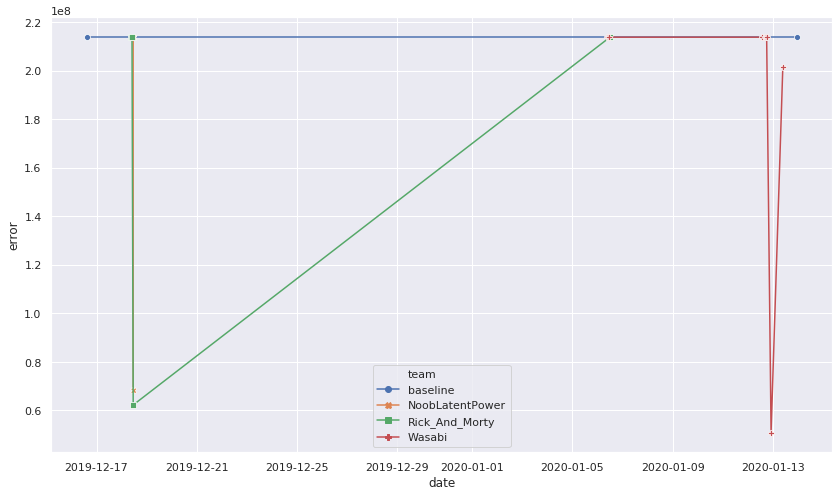

In [25]:
plt.figure(figsize=(14,8))
ax = sns.lineplot(x="date", y="error",
                  hue="team", style="team",
                  markers=True, dashes=False,
                  data=results);

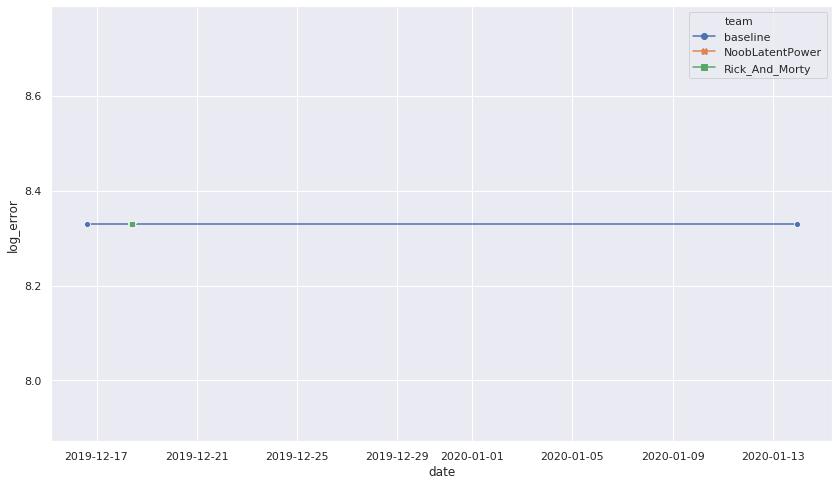

In [5]:
plt.figure(figsize=(14,8))
ax = sns.lineplot(x="date", y="log_error",
                  hue="team", style="team",
                  markers=True, dashes=False,
                  data=results)